In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#plt.rcParams.keys()
plt.rcParams.update({
    'font.size': 14,
    'figure.figsize':(8,4.5), 
    'lines.linewidth':3,
    'axes.linewidth':2
})

In [3]:
data = pd.read_csv('Dsig_dt_Data_7percent_sys_unc.txt', sep=" ")

In [4]:
data = pd.read_csv('Dsig_dt_Data_7percent_sys_unc.txt', sep=" ")
array_test = np.array(data['5.stat_unc(CosTheta)'])*np.array(data['8.dsig_dt'])/np.array(data['4.dsig_dCosTheta'])
data = pd.DataFrame(data)
data['11.real_unc'] = array_test.tolist()

In [5]:
data.head(5)

,0.W,1.s,2.-t,3.CosTheta,4.dsig_dCosTheta,5.stat_unc(CosTheta),6.sys_unc(CosTheta),7.tot_unc_dsig_dCosTheta,8.dsig_dt,9.-t/s,10.tot_unc_dsig_dt,11.real_unc
0,1.725,2.975625,0.373026,-0.45,1.707,0.126,0.11949,0.173649,23.830871,0.125361,2.424252,1.759045
1,1.725,2.975625,0.365863,-0.35,1.665,0.116,0.11655,0.164438,23.244523,0.122953,2.295667,1.619438
2,1.725,2.975625,0.358700,-0.25,1.594,0.105,0.11158,0.153216,22.253315,0.120546,2.138997,1.465871
3,1.725,2.975625,0.351537,-0.15,1.528,0.099,0.10696,0.145744,21.331910,0.118139,2.034691,1.382107
4,1.725,2.975625,0.344374,-0.05,1.414,0.090,0.09898,0.133780,19.740393,0.115732,1.867656,1.256461


In [6]:
data.tail() 

,0.W,1.s,2.-t,3.CosTheta,4.dsig_dCosTheta,5.stat_unc(CosTheta),6.sys_unc(CosTheta),7.tot_unc_dsig_dCosTheta,8.dsig_dt,9.-t/s,10.tot_unc_dsig_dt,11.real_unc
1955,2.835,8.037225,1.284964,0.55,0.2003,0.0091,0.014021,0.016715,0.070543,0.159877,0.005887,0.003205
1956,2.835,8.037225,1.001023,0.65,0.3269,0.0131,0.022883,0.026367,0.115129,0.124548,0.009286,0.004614
1957,2.835,8.037225,0.717081,0.75,0.8625,0.0270,0.060375,0.066137,0.303760,0.089220,0.023293,0.009509
1958,2.835,8.037225,0.433140,0.85,3.4740,0.1250,0.243180,0.273426,1.223492,0.053892,0.096296,0.044023
1959,2.835,8.037225,0.234381,0.92,11.9600,1.0660,0.837200,1.355456,4.212138,0.029162,0.477372,0.375430


## Look at $-t> 2 GeV^2$ and $|cos\theta| < 0.1$

In [7]:
t_min = 2.0
cos_th_lim = 0.2

data_CCR = data[(data['2.-t']>t_min) & (data['3.CosTheta']<cos_th_lim) & (-cos_th_lim <data['3.CosTheta'])]
data_CCR

,0.W,1.s,2.-t,3.CosTheta,4.dsig_dCosTheta,5.stat_unc(CosTheta),6.sys_unc(CosTheta),7.tot_unc_dsig_dCosTheta,8.dsig_dt,9.-t/s,10.tot_unc_dsig_dt,11.real_unc
1189,2.415,5.832225,2.009701,-0.15,0.39770,0.01120,0.027839,0.030007,0.229430,0.344586,0.017311,0.006461
1208,2.425,5.880625,2.037393,-0.15,0.37800,0.01060,0.026460,0.028504,0.215040,0.346459,0.016216,0.006030
1227,2.435,5.929225,2.065200,-0.15,0.36370,0.01080,0.025459,0.027655,0.204063,0.348309,0.015517,0.006060
1246,2.445,5.978025,2.093124,-0.15,0.34610,0.01030,0.024227,0.026326,0.191547,0.350136,0.014570,0.005700
1265,2.455,6.027025,2.121163,-0.15,0.32330,0.00950,0.022631,0.024544,0.176519,0.351942,0.013401,0.005187
...,...,...,...,...,...,...,...,...,...,...,...,...
1932,2.825,7.980625,2.396781,0.15,0.06536,0.00367,0.004575,0.005865,0.023251,0.300325,0.002086,0.001306
1948,2.835,8.037225,3.272553,-0.15,0.03751,0.00254,0.002626,0.003653,0.013210,0.407175,0.001287,0.000895
1949,2.835,8.037225,2.988612,-0.05,0.03688,0.00245,0.002582,0.003559,0.012989,0.371846,0.001253,0.000863
1950,2.835,8.037225,2.704670,0.05,0.05218,0.00302,0.003653,0.004739,0.018377,0.336518,0.001669,0.001064


In [8]:
data_CCR.describe()

,0.W,1.s,2.-t,3.CosTheta,4.dsig_dCosTheta,5.stat_unc(CosTheta),6.sys_unc(CosTheta),7.tot_unc_dsig_dCosTheta,8.dsig_dt,9.-t/s,10.tot_unc_dsig_dt,11.real_unc
count,118.00000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,2.66500,7.114689,2.455835,-0.033898,0.132778,0.005346,0.009295,0.010775,0.061319,0.345076,0.004940,0.002399
std,0.11212,0.594104,0.325654,0.106193,0.083396,0.002084,0.005838,0.006106,0.047832,0.032963,0.003555,0.001284
min,2.41500,5.832225,2.002904,-0.150000,0.036880,0.002450,0.002582,0.003559,0.012989,0.284139,0.001253,0.000863
25%,2.58500,6.682225,2.190429,-0.150000,0.070297,0.003727,0.004921,0.006202,0.026093,0.321131,0.002342,0.001446
50%,2.67500,7.155625,2.389353,-0.050000,0.108350,0.004900,0.007584,0.009112,0.045230,0.346584,0.003742,0.002055
75%,2.76500,7.645225,2.664336,0.050000,0.167325,0.006575,0.011713,0.013573,0.076975,0.368794,0.006232,0.003078
max,2.83500,8.037225,3.272553,0.150000,0.397700,0.011200,0.027839,0.030007,0.229430,0.407175,0.017311,0.006461


In [9]:
CosTheta_neg05 = data_CCR[data_CCR['3.CosTheta'].between(-0.06,-0.04)]
CosTheta_pos05 = data_CCR[data_CCR['3.CosTheta'].between(0.04,0.06)]
CosTheta_neg15 = data_CCR[data_CCR['3.CosTheta'].between(-0.16,-0.14)]
CosTheta_pos15 = data_CCR[data_CCR['3.CosTheta'].between(0.14,0.15)]

# $\chi^2$ Minimization

In [10]:
def fit_func(x, A,B,N):
    s, cos_th = x
    return (A+B*cos_th)*np.power(s,-N)

In [11]:
from scipy.optimize import curve_fit

In [12]:
s = np.array(data_CCR['1.s'])
cos_th = np.array(data_CCR['3.CosTheta'])
y = data_CCR['8.dsig_dt']
sigma_y = data_CCR['11.real_unc']

## Curve fit

In [13]:
popt, pcov = curve_fit(fit_func, (s, cos_th), y, sigma = sigma_y, 
                       #p0=[10**(6),10**(6), 9]
                      )

In [14]:
popt

array([2.55953203e+06, 3.09840943e+06, 9.07091196e+00])

In [15]:
np.sqrt(np.diag(pcov))

array([3.94070824e+05, 5.76035359e+05, 7.90492483e-02])

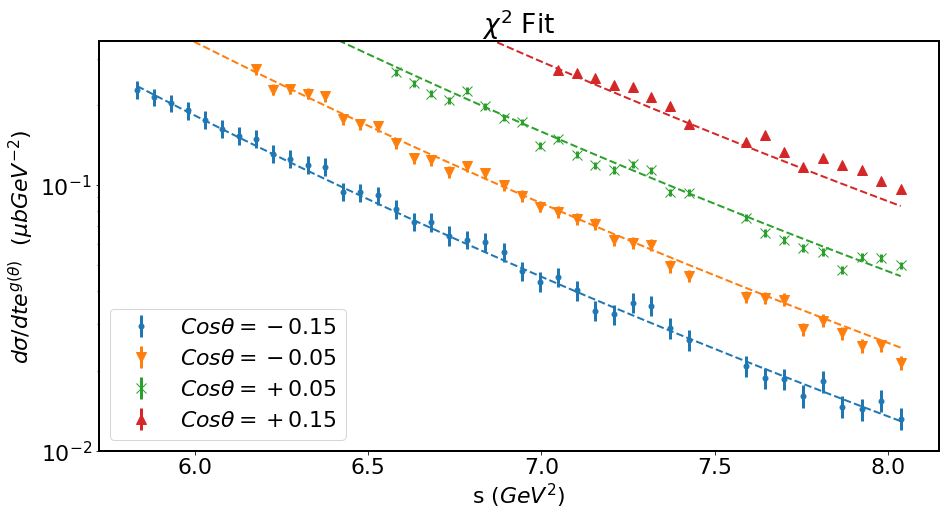

In [16]:
color_array = ['C0','C1','C2','C3', 'C4']
format_array = ['.', 'v', 'x',  '^', '+']

scale= 0.85

plt.rcParams.update({
    'font.size': 22,
    'figure.figsize':(scale*16,scale*9), 
    'lines.linewidth':3,
    'axes.linewidth':2
})

ms = 10
lw = 2

def clarity_factor(costh):
    return np.exp(5*(costh+0.15))

plt.errorbar(CosTheta_neg15['1.s'],CosTheta_neg15['8.dsig_dt']*clarity_factor(-0.15), 
             yerr= CosTheta_neg15['10.tot_unc_dsig_dt'], 
             fmt=format_array[0], color = color_array[0], markersize=10,
            label='$Cos \\theta = - 0.15$')

plt.errorbar(CosTheta_neg05['1.s'],CosTheta_neg05['8.dsig_dt']*clarity_factor(-0.05), 
             yerr= CosTheta_neg05['10.tot_unc_dsig_dt'], 
             fmt=format_array[1], color = color_array[1], markersize=10,
            label='$Cos \\theta = - 0.05$')

plt.errorbar(CosTheta_pos05['1.s'],CosTheta_pos05['8.dsig_dt']*clarity_factor(0.05), 
             yerr= CosTheta_pos05['10.tot_unc_dsig_dt'], 
             fmt=format_array[2], color = color_array[2], markersize=10,
            label='$Cos \\theta = + 0.05$')


plt.errorbar(CosTheta_pos15['1.s'],CosTheta_pos15['8.dsig_dt']*clarity_factor(0.15), 
             yerr= CosTheta_pos15['10.tot_unc_dsig_dt'], 
             fmt=format_array[3], color = color_array[3], markersize=10,
            label='$Cos \\theta = + 0.15$')


plt.plot(s, (popt[0]-0.15*popt[1])*np.power(s,-popt[2])*clarity_factor(-0.15), ls='--',
        #label='$Cos \\theta = -0.05$ Fit',
        color='C0',
        lw = lw
        )


plt.plot(s, (popt[0]-0.05*popt[1])*np.power(s,-popt[2])*clarity_factor(-0.05), ls='--',
        #label='$Cos \\theta = -0.05$ Fit',
        color='C1',
        lw = lw
        )


plt.plot(s, (popt[0]+0.05*popt[1])*np.power(s,-popt[2])*clarity_factor(0.05), 
         ls='--',
        #label='$Cos \\theta = + 0.05$ Fit',
        color = 'C2',
        lw = lw
        )


plt.plot(s, (popt[0]+0.15*popt[1])*np.power(s,-popt[2])*clarity_factor(0.15), 
         ls='--',
        #label='$Cos \\theta = + 0.15$ Fit',
        color = 'C3',
        lw = lw
        )



plt.yscale('log')
plt.title('$\chi^2$ Fit ')
plt.xlabel('s ($GeV^2$)')
plt.ylabel('$d\sigma/dt  e^{g(\\theta)} \ \ (\mu b GeV^{-2})$')
plt.legend(
    #fontsize=18, 
    loc='lower left')
plt.tight_layout()
plt.ylim(10**(-2),0.35)
plt.savefig('4 bin fit.png', dpi=300)

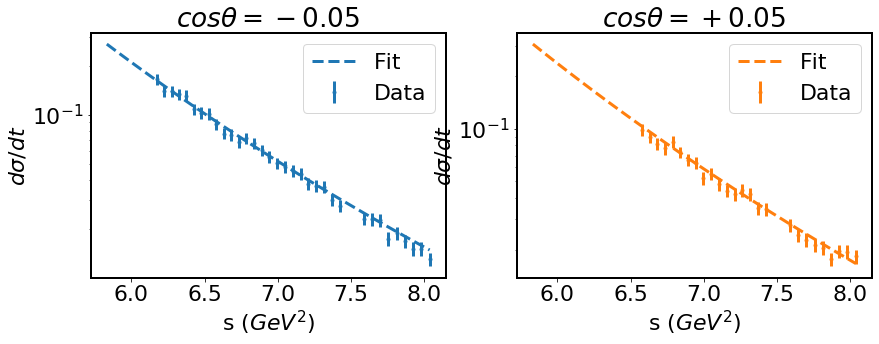

In [17]:
fig = plt.figure(figsize=(14, 4.5))

plt.subplot(121)
plt.errorbar(CosTheta_neg05['1.s'],CosTheta_neg05['8.dsig_dt'], 
             yerr= CosTheta_neg05['10.tot_unc_dsig_dt'], fmt='.',
            label='Data',
            color = 'C0')

plt.plot(s, (popt[0]-0.05*popt[1])*np.power(s,-popt[2]), ls='--',
        label='Fit',
        color='C0')

plt.yscale('log')
plt.title('$cos\\theta = -0.05$')
plt.xlabel('s ($GeV^2$)')
plt.ylabel('$d\sigma/dt$')
plt.legend()
#############
##############



plt.subplot(122)

plt.errorbar(CosTheta_pos05['1.s'],CosTheta_pos05['8.dsig_dt'], 
             yerr= CosTheta_pos05['10.tot_unc_dsig_dt'], fmt='.',
            label='Data',
            color = 'C1')
plt.plot(s, (popt[0]+0.05*popt[1])*np.power(s,-popt[2]), 
         ls='--',
        label='Fit',
        color = 'C1')


plt.yscale('log')
plt.title('$cos\\theta = +0.05$')
plt.xlabel('s ($GeV^2$)')
plt.ylabel('$d\sigma/dt$')
plt.legend()

#plt.tight_layout()
plt.savefig('omega photoprod - chi sqred min (4 bins).png', dpi=300)

In [18]:
y_pred = fit_func((s, cos_th), popt[0], popt[1], popt[2])

In [19]:
np.sum((y -y_pred ) ** 2 / sigma_y**2)/(len(y)-3)

2.2273317326459225

(array([ 4.,  7., 14., 15., 16., 19., 12., 15.,  9.,  7.]),
 array([-3.15979343, -2.54347692, -1.92716042, -1.31084392, -0.69452741,
        -0.07821091,  0.5381056 ,  1.1544221 ,  1.7707386 ,  2.38705511,
         3.00337161]),
 <a list of 10 Patch objects>)

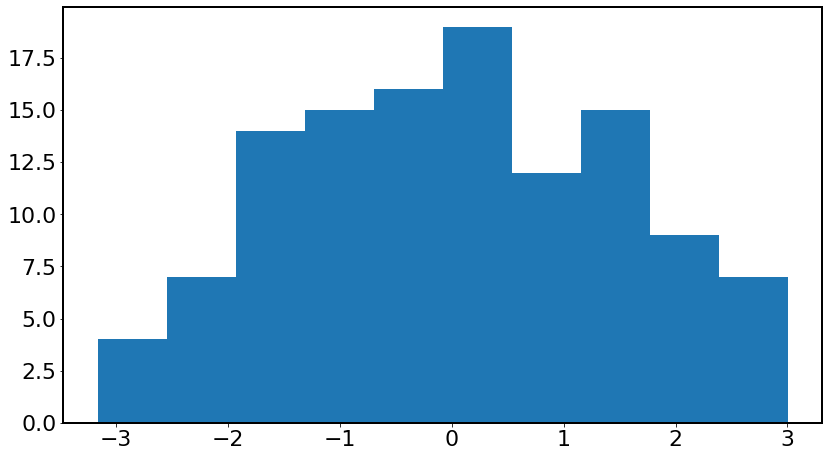

In [20]:
plt.hist((y -y_pred)/sigma_y)

Text(0.5, 0, '$\\sigma$')

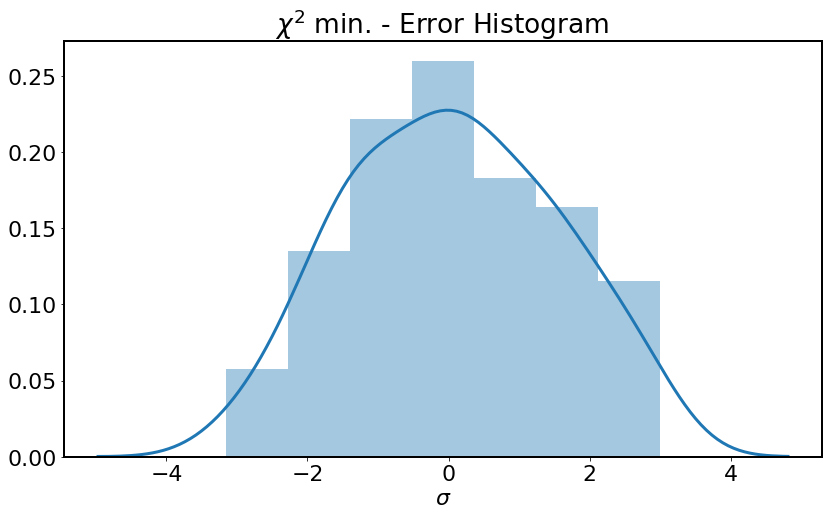

In [21]:
import seaborn as sns

sns.distplot((y -y_pred)/sigma_y)
plt.title('$\chi^2$ min. - Error Histogram ')
plt.xlabel('$\sigma$')

### $N = 9.071 \pm 0.079$ with $\chi^2/df = 2.23$

## Now Bayesian Estimation of Parameters

Let us assume, $\mathcal{P}(A,B,N) = \mathcal{P}(A) \mathcal{P}(B) \mathcal{P}(C)$.

Furthermore, since the literature points to both $N \approx 7$ and $9$ our prior will be a Gaussian with mean 8 and $\sigma = 1$. For 

In [22]:
import emcee

In [23]:
popt, pcov = curve_fit(fit_func, (s, cos_th), y, sigma = sigma_y, 
                       #p0=[10**(6),10**(6), 9]
                      )

In [24]:
def log_likelihood(params, s_in, cos_th_in, y, yerr):
    A, B, N = params
    x_in = s_in, cos_th_in 
    model = fit_func(x_in, A, B, N)
    sigma2 = yerr ** 2
    
    return -0.5 * np.sum((y - model) ** 2 / sigma2) 

In [25]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)

soln = minimize(nll, 
                np.array([3*10**(6),4*10**(6), 9.1]), 
                args=(s, cos_th, y, sigma_y),
                method = 'Nelder-Mead')

A_ML, B_ML, N_ML = soln.x

print("Maximum likelihood estimates:")
print("A = {0:.3f}".format(A_ML))
print("B = {0:.3f}".format(B_ML))
print("C = {0:.3f}".format(N_ML))

Maximum likelihood estimates:
A = 2559530.308
B = 3098406.924
C = 9.071


In [26]:
soln 

 final_simplex: (array([[2.55953031e+06, 3.09840692e+06, 9.07091162e+00],
       [2.55953031e+06, 3.09840692e+06, 9.07091162e+00],
       [2.55953031e+06, 3.09840692e+06, 9.07091162e+00],
       [2.55953031e+06, 3.09840692e+06, 9.07091162e+00]]), array([128.07157463, 128.07157463, 128.07157463, 128.07157463]))
           fun: 128.07157462711893
       message: 'Optimization terminated successfully.'
          nfev: 346
           nit: 179
        status: 0
       success: True
             x: array([2.55953031e+06, 3.09840692e+06, 9.07091162e+00])

In [27]:
def log_prior(theta):
    A, B, N = theta
    if  5 < N < 10 and 10**4 < A < 10**7 and 10**4 < B < 10**7:
        return 0.0
    return -np.inf

def log_probability(theta, s_in, cos_th_in, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, s_in, cos_th_in, y, yerr)

In [28]:
pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, 
                                args=(s, cos_th, y, sigma_y))
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:40<00:00, 33.74it/s]


In [29]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


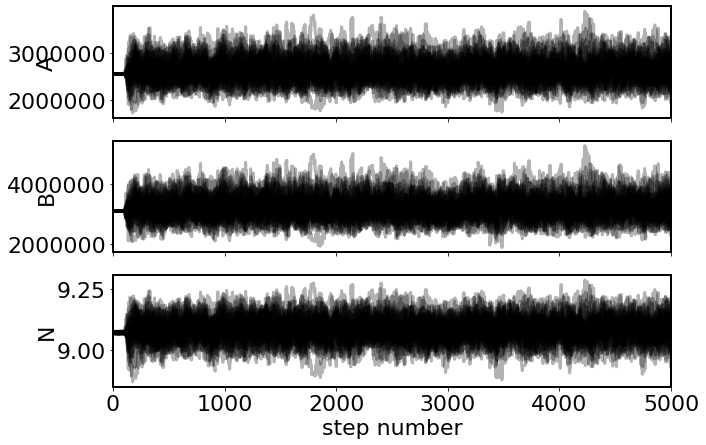

In [30]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["A", "B", "N"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [31]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


In [32]:
flat_samples

array([[2.58406574e+06, 3.17222589e+06, 9.07870798e+00],
       [2.57340123e+06, 3.15126495e+06, 9.07364073e+00],
       [2.56049882e+06, 3.02314253e+06, 9.07467958e+00],
       ...,
       [2.75758619e+06, 3.51097809e+06, 9.10500182e+00],
       [2.88974221e+06, 3.54337653e+06, 9.13395968e+00],
       [2.24734576e+06, 2.68786115e+06, 8.99919579e+00]])

In [33]:
flat_scaled =  np.array([flat_samples[:,0]/10**6, flat_samples[:,1]/10**6, flat_samples[:,2]])

In [34]:
flat_scaled = np.transpose(flat_scaled)
flat_scaled.shape

(10432, 3)

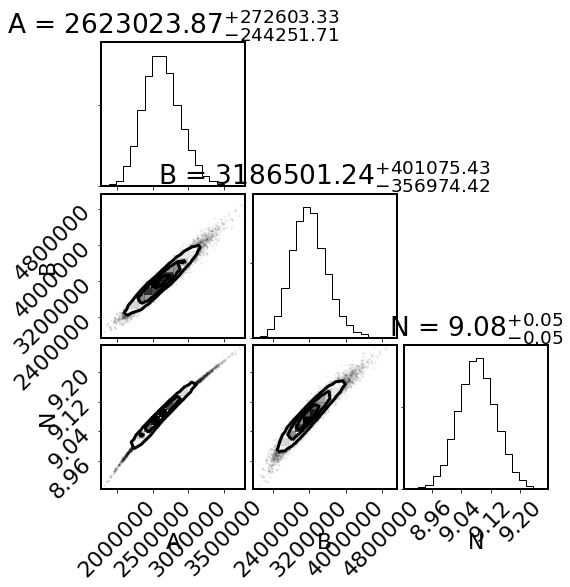

In [35]:
import corner
import matplotlib.ticker as mtick

fig = corner.corner(
    flat_samples, labels=labels, show_titles=True,
    #quantiles=[0.16, 0.5, 0.84],
);

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

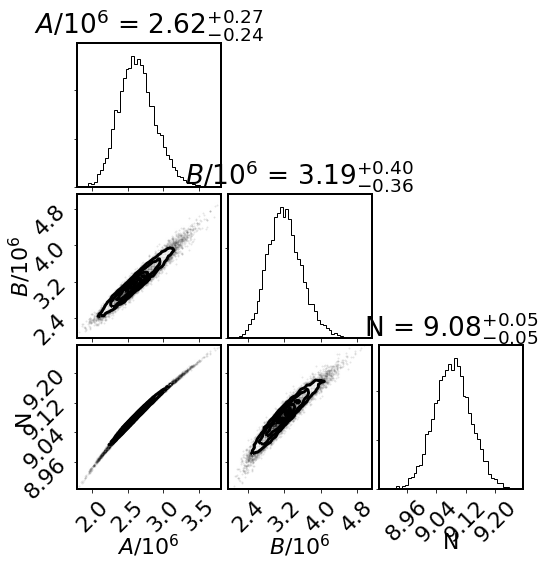

In [36]:
import corner
import matplotlib.ticker as mtick

fig = corner.corner(
    flat_scaled, labels=['$A/10^6$', '$B/10^6$','N'], show_titles=True,
    #quantiles=[0.16, 0.5, 0.84],
    bins=50
);

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.savefig('CCR- omega - Bayesian parameter distribution (2)(4 bins).png', dpi=300)

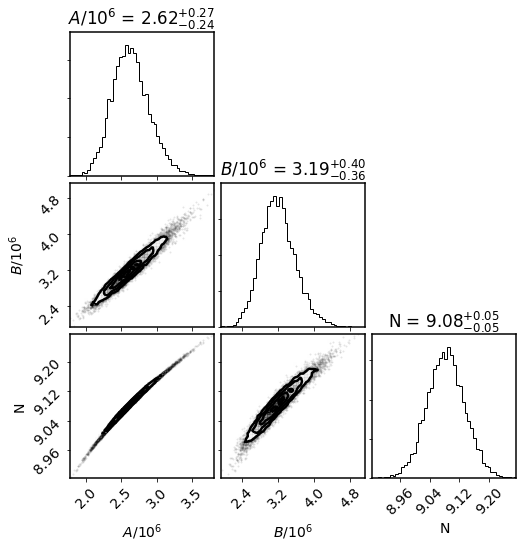

In [37]:
import corner
import matplotlib.ticker as mtick


plt.rcParams.update({
    'font.size': 14,
    'figure.figsize':(scale*16,scale*9), 
    'lines.linewidth':2.5,
    'axes.linewidth':1.5
})

fig = corner.corner(
    flat_scaled, labels=['$A/10^6$', '$B/10^6$','N'], show_titles=True,
    #quantiles=[0.16, 0.5, 0.84],
    bins=50
); 

plt.plot(1,1)

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.savefig('CCR- omega - Bayesian parameter distribution (2)(4 bins).png', dpi=300)

(array([  15.,   71.,  454., 1555., 2844., 2959., 1739.,  634.,  143.,
          18.]),
 array([8.88480231, 8.92377958, 8.96275685, 9.00173413, 9.0407114 ,
        9.07968867, 9.11866595, 9.15764322, 9.19662049, 9.23559777,
        9.27457504]),
 <a list of 10 Patch objects>)

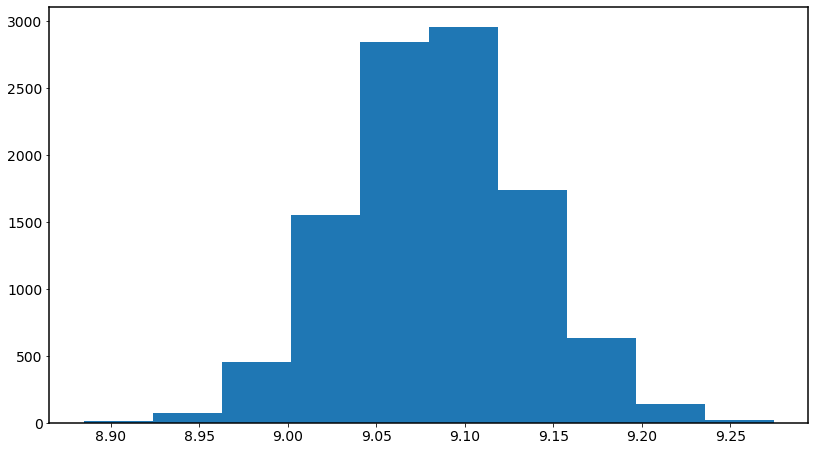

In [38]:
plt.hist(flat_samples[:,2])

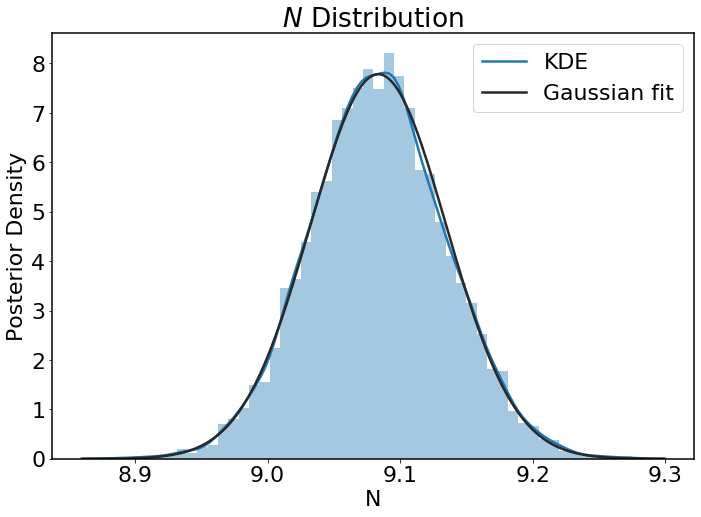

In [39]:
import seaborn as sns
import scipy.stats as stats

#plt.rcParams.keys()
#plt.rcParams.keys()
scale= 0.85

plt.rcParams.update({
    'font.size': 22,
    'figure.figsize':(scale*12,scale*9), 
    'lines.linewidth':2.5,
    'axes.linewidth':1.5
})

sns.distplot(flat_samples[:,2], kde_kws={'label': 'KDE'},
            fit=stats.norm
            )
plt.xlabel('N')
plt.ylabel('Posterior Density')
plt.title('$N$ Distribution')
plt.legend(['KDE', 'Gaussian fit'])
plt.tight_layout()
plt.savefig('N distribution(4 bins).png', dpi=300)

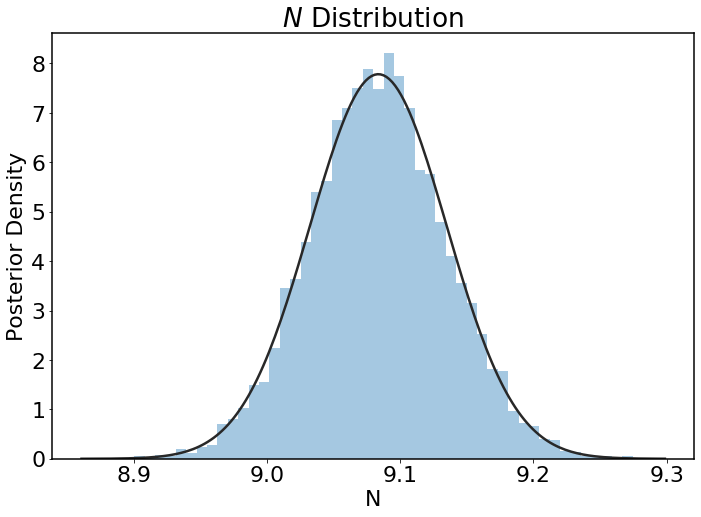

In [40]:
import seaborn as sns
import scipy.stats as stats
sns.distplot(flat_samples[:,2], 
             #kde_kws={'label': 'KDE'},
            fit=stats.norm, kde=False
            )
plt.xlabel('N')
plt.ylabel('Posterior Density')
plt.title('$N$ Distribution')
plt.tight_layout()
plt.savefig('N distribution - norm fit(4 bins).png', dpi=300)

In [41]:
flat_samples[:,2].std()

0.051264938866047445

In [42]:
flat_samples[:,2].mean()

9.083526763180416

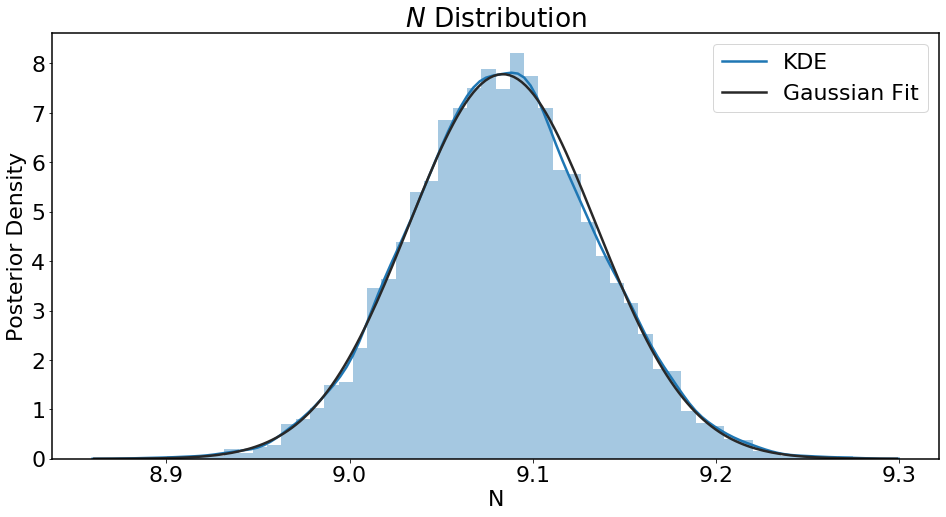

In [43]:
import seaborn as sns
import scipy.stats as stats

#plt.rcParams.keys()
#plt.rcParams.keys()
scale= 0.85

plt.rcParams.update({
    'font.size': 22,
    'figure.figsize':(scale*16,scale*9), 
    'lines.linewidth':2.5,
    'axes.linewidth':1.5
})

sns.distplot(flat_samples[:,2], 
             kde_kws={'label': 'KDE'},
            fit=stats.norm
            )
plt.xlabel('N')
plt.ylabel('Posterior Density')
plt.title('$N$ Distribution')
plt.legend(['KDE', 'Gaussian Fit'])
plt.tight_layout()
plt.savefig('N distribution(4 bins).png', dpi=300)

In [44]:
inds = np.random.randint(len(flat_samples), size=100)

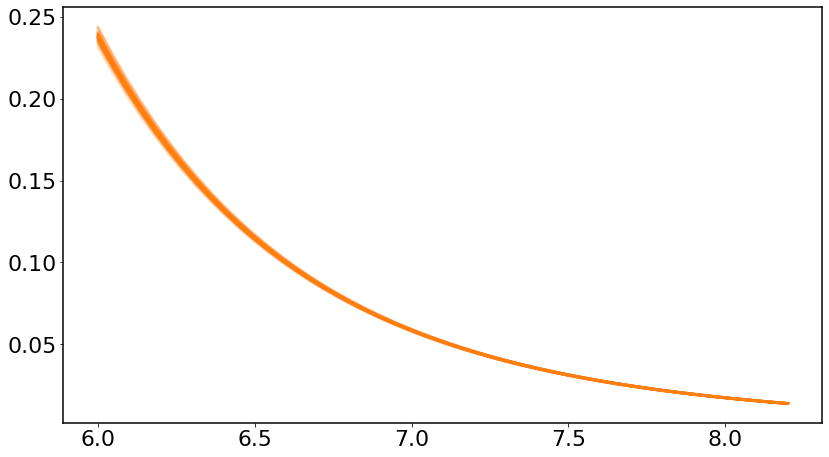

In [45]:
s0 = np.linspace(6,8.2)

for ind in inds:
    sample = flat_samples[ind]
    plt.plot(s0, fit_func((s0,0.05),sample[0],sample[1],sample[2]), "C1", alpha=0.1)

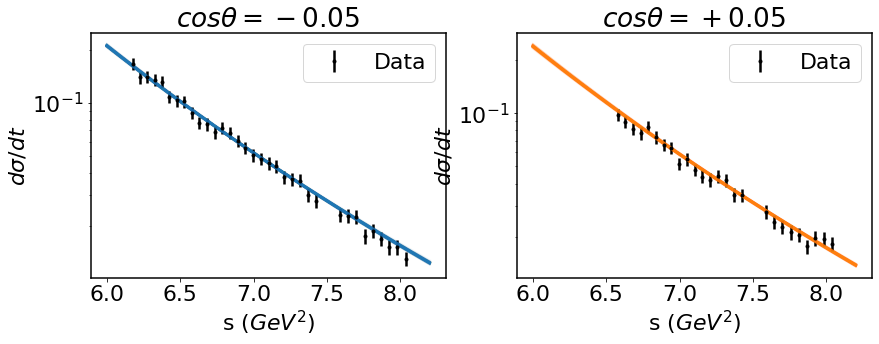

In [46]:
fig = plt.figure(figsize=(14, 4.5))

plt.subplot(121)
plt.errorbar(CosTheta_neg05['1.s'],CosTheta_neg05['8.dsig_dt'], 
             yerr= CosTheta_neg05['10.tot_unc_dsig_dt'], fmt='.',
            label='Data',
            color = 'k')

for ind in inds:
    sample = flat_samples[ind]
    plt.plot(s0, fit_func((s0,-0.05),sample[0],sample[1],sample[2]), "C0", alpha=0.05)
    
plt.yscale('log')
plt.title('$cos\\theta = -0.05$')
plt.xlabel('s ($GeV^2$)')
plt.ylabel('$d\sigma/dt$')
plt.legend()
#############
##############



plt.subplot(122)

plt.errorbar(CosTheta_pos05['1.s'],CosTheta_pos05['8.dsig_dt'], 
             yerr= CosTheta_pos05['10.tot_unc_dsig_dt'], fmt='.',
            label='Data',
            color = 'k')

for ind in inds:
    sample = flat_samples[ind]
    plt.plot(s0, fit_func((s0,+0.05),sample[0],sample[1],sample[2]), "C1", alpha=0.05)


plt.yscale('log')
plt.title('$cos\\theta = +0.05$')
plt.xlabel('s ($GeV^2$)')
plt.ylabel('$d\sigma/dt$')
plt.legend()


#plt.tight_layout()
plt.savefig('omega photoprod - chi sqred min (error)(4 bins).png', dpi=300)

### Testing dependence on priors

In [47]:
def log_prior2(theta):
    A, B, N = theta
    N_mean = 7.2
    N_sigma = 0.7
    if  10**4 < A < 10**7 and 10**4 < B < 10**7:
        return np.exp(-(N-N_mean)**2/(2*N_sigma**2))/np.sqrt(2*np.pi) 
    return -np.inf

def log_probability2(theta, s_in, cos_th_in, y, yerr):
    lp = log_prior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, s_in, cos_th_in, y, yerr)

In [48]:
pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler2 = emcee.EnsembleSampler(nwalkers, ndim, log_probability2, 
                                args=(s, cos_th, y, sigma_y))
sampler2.run_mcmc(pos, 5000, progress=True);

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [03:02<00:00, 28.58it/s]


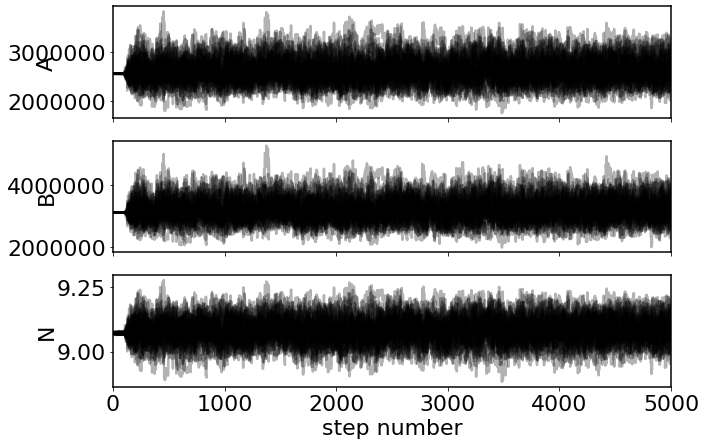

In [49]:
flat_samples2 = sampler2.get_chain(discard=100, thin=15, flat=True)
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler2.get_chain()
labels = ["A", "B", "N"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [50]:
flat_samples2 = sampler2.get_chain(discard=100, thin=15, flat=True)
print(flat_samples2.shape)
flat_scaled2 =  np.array([flat_samples2[:,0]/10**6, flat_samples2[:,1]/10**6, flat_samples2[:,2]])

(10432, 3)


In [51]:
flat_scaled2.shape

(3, 10432)

In [52]:
flat_scaled2 = np.transpose(flat_scaled2)
flat_scaled2.shape

(10432, 3)

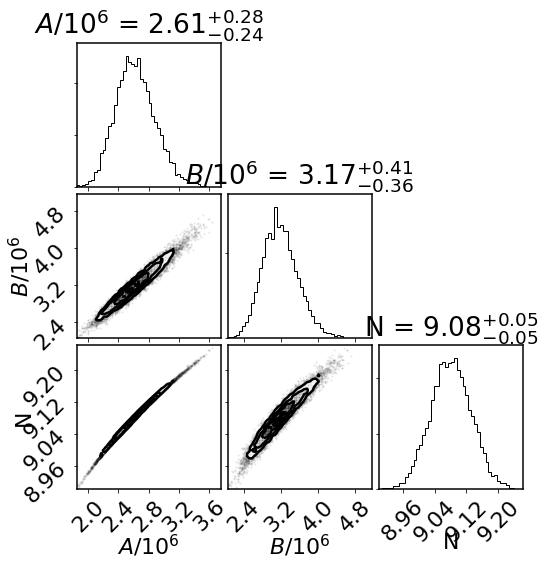

In [53]:
fig2 = corner.corner(
    flat_scaled2, labels=['$A/10^6$', '$B/10^6$','N'], show_titles=True,
    #quantiles=[0.16, 0.5, 0.84],
    bins=50
);

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.savefig('CCR- omega - Bayesian parameter distribution (Gaussian prior)(4 bins).png', dpi=300)

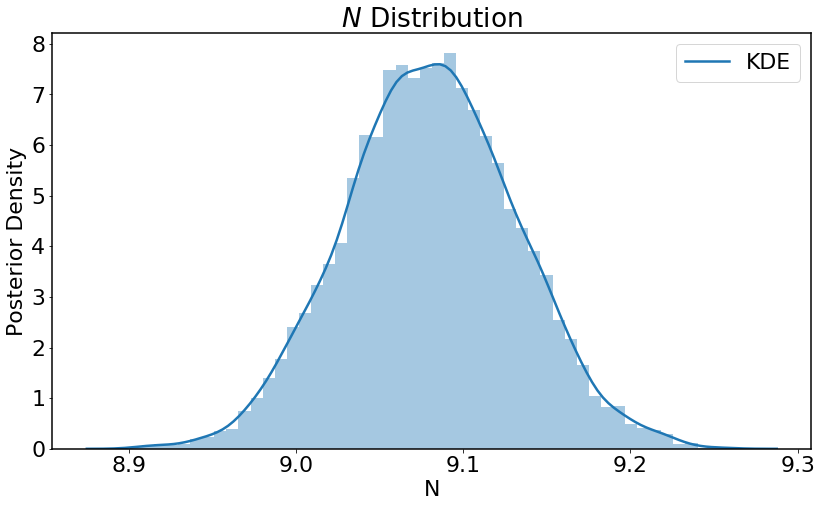

In [54]:
import seaborn as sns
import scipy.stats as stats
sns.distplot(flat_samples2[:,2], kde_kws={'label': 'KDE'},
            #fit=stats.norm
            )
plt.xlabel('N')
plt.ylabel('Posterior Density')
plt.title('$N$ Distribution')
plt.savefig('N distribution (Gaussian prior)(4 bins).png', dpi=300)

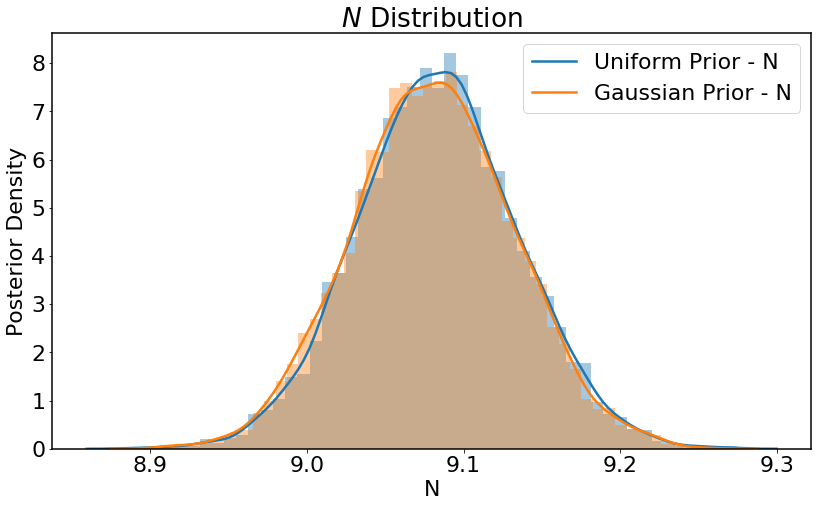

In [55]:
sns.distplot(flat_samples[:,2], kde_kws={'label': 'Uniform Prior - N'})
sns.distplot(flat_samples2[:,2], kde_kws={'label': 'Gaussian Prior - N'})


plt.xlabel('N')
plt.ylabel('Posterior Density')
plt.title('$N$ Distribution')
plt.savefig('N distribution (Gaussian and uniform prior)(4 bins).png', dpi=300)

In [56]:
print(flat_samples2[:,2].std())
flat_samples2[:,2].mean()

0.05152160260642426


9.08072991841425

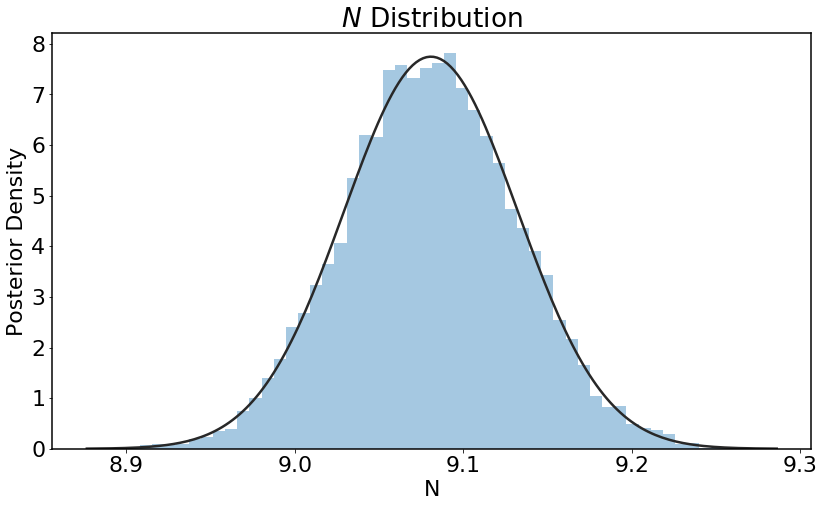

In [57]:
import seaborn as sns
import scipy.stats as stats
sns.distplot(flat_samples2[:,2], 
             #kde_kws={'label': 'KDE'},
            fit=stats.norm, kde=False
            )
plt.xlabel('N')
plt.ylabel('Posterior Density')
plt.title('$N$ Distribution')
plt.savefig('N distribution - norm fit (Gaussian prior)(4 bins).png', dpi=300)

In [58]:
N_b = flat_samples[:,2].mean()
B_b = flat_samples[:,1].mean()
A_b = flat_samples[:,0].mean()

In [59]:
N_b

9.083526763180416

In [60]:
A_b

2636136.7555556544

In [61]:
y_pred_b = fit_func((s, cos_th), A_b, B_b, N_b)

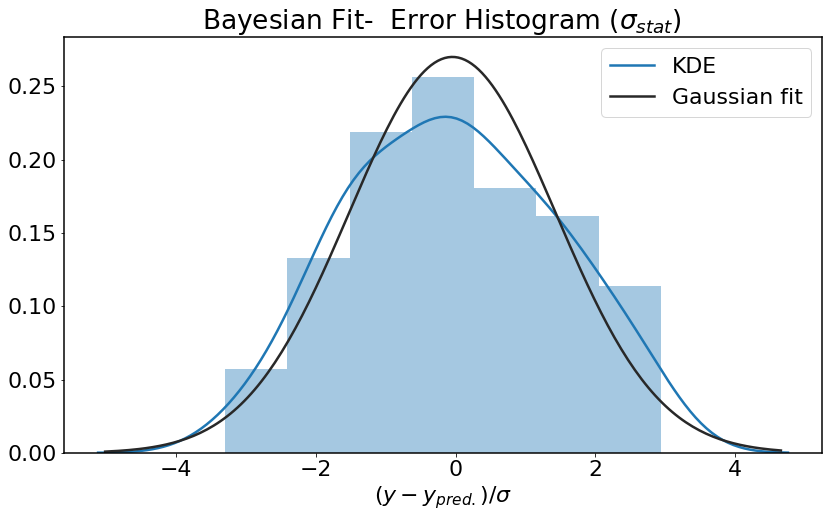

In [62]:
sns.distplot((y -y_pred_b)/sigma_y,
             kde_kws={'label': 'KDE'},
            #hist_kws={'label': '$y-y_{pred.}$'}
             fit=stats.norm
            )
plt.title('Bayesian Fit-  Error Histogram ($\sigma_{stat}$) ')
plt.xlabel('$(y-y_{pred.})/\sigma$')
plt.legend(['KDE', 'Gaussian fit'])

plt.savefig('Bayesian Fit-  Error Histogram (stat only)(4 bins).png', dpi=300)

In [63]:
np.mean((y -y_pred_b)/sigma_y)

-0.04621463187741079

In [64]:
np.std((y -y_pred_b)/sigma_y)

1.477098400555447

### Second prior test

Now assume we were overconfident about scaling, $N \sim \mathcal{N}(7,0.25)$

In [65]:
def log_prior3(theta):
    A, B, N = theta
    N_mean = 7
    N_sigma = 0.0001
    if  10**4 < A < 10**7 and 10**4 < B < 10**7:
        return np.exp(-(N-N_mean)**2/(2*N_sigma**2))/np.sqrt(2*np.pi) 
    return -np.inf

def log_probability3(theta, s_in, cos_th_in, y, yerr):
    lp = log_prior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, s_in, cos_th_in, y, yerr)

In [66]:
pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler3 = emcee.EnsembleSampler(nwalkers, ndim, log_probability2, 
                                args=(s, cos_th, y, sigma_y))
sampler3.run_mcmc(pos, 5000, progress=True);

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:49<00:00, 29.54it/s]


In [67]:
flat_samples3 = sampler3.get_chain(discard=100, thin=15, flat=True)
print(flat_samples3.shape)
flat_scaled3 =  np.array([flat_samples3[:,0]/10**6, flat_samples3[:,1]/10**6, flat_samples3[:,2]])

(10432, 3)


In [68]:
print(flat_scaled3.shape)

flat_scaled3 = np.transpose(flat_scaled3)
flat_scaled3.shape

(3, 10432)


(10432, 3)

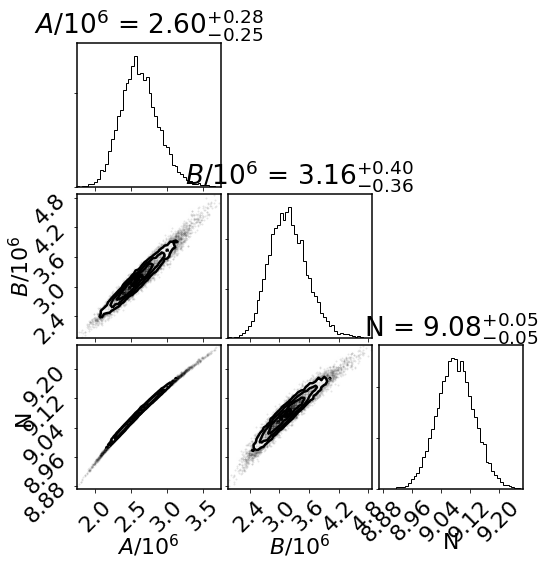

In [69]:
fig3 = corner.corner(
    flat_scaled3, labels=['$A/10^6$', '$B/10^6$','N'], show_titles=True,
    #quantiles=[0.16, 0.5, 0.84],
    bins=50
);

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.savefig('CCR- omega - Bayesian parameter distribution (Gaussian prior - strict)(4 bins).png', dpi=300)

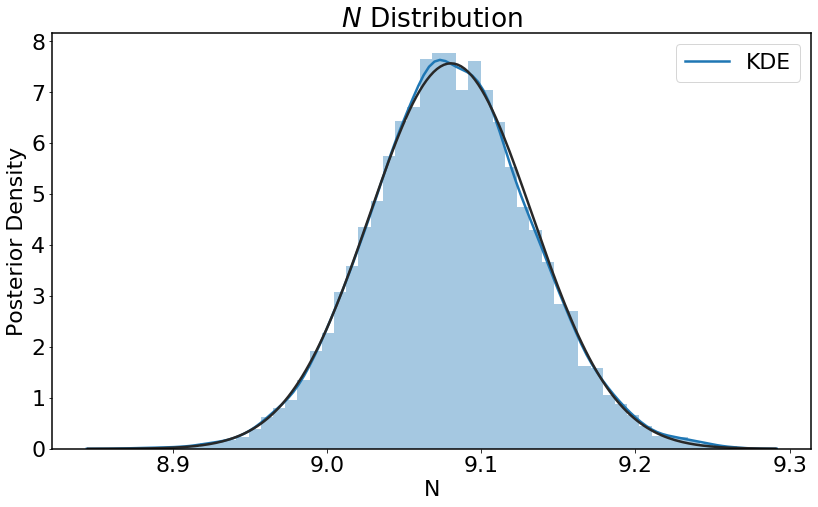

In [70]:
import seaborn as sns
import scipy.stats as stats
sns.distplot(flat_samples3[:,2], kde_kws={'label': 'KDE'},
            fit=stats.norm
            )
plt.xlabel('N')
plt.ylabel('Posterior Density')
plt.title('$N$ Distribution')
plt.savefig('N distribution (Gaussian prior - strict)(4 bins).png', dpi=300)

In [71]:
np.mean(flat_samples3[:,2])

9.080424678670798

In [72]:
np.std(flat_samples3[:,2])

0.05271535778924974

In [73]:
len(data_CCR)

118

### Thus, $N = 9.080 \pm 0.053$ 

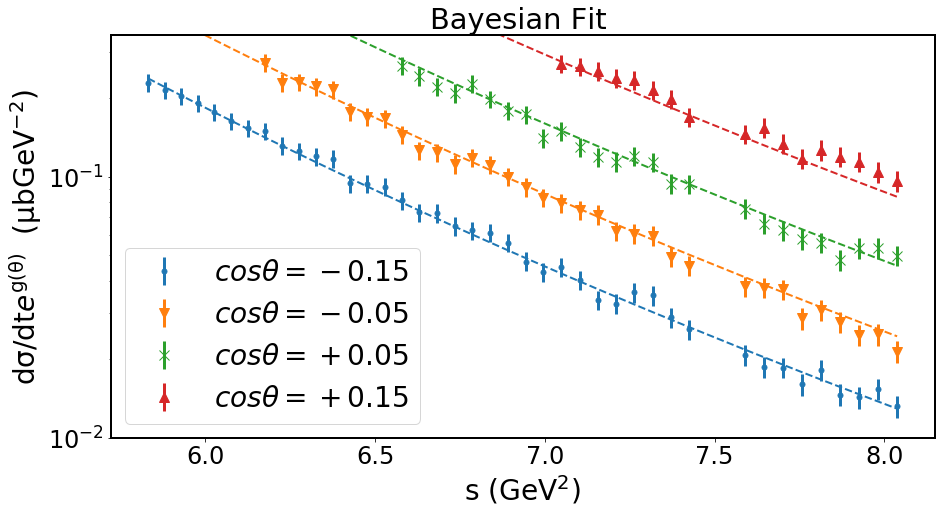

In [87]:
color_array = ['C0','C1','C2','C3', 'C4']
format_array = ['.', 'v', 'x',  '^', '+']

scale= 0.85

plt.rcParams.update({
    'font.size': 24,
    'figure.figsize':(scale*16,scale*9), 
    'lines.linewidth':3,
    'axes.linewidth':2
})

ms = 8
lw = 2

def clarity_factor(costh):
    return np.exp(5*(costh+0.15))

plt.errorbar(CosTheta_neg15['1.s'],CosTheta_neg15['8.dsig_dt']*clarity_factor(-0.15), 
             yerr= CosTheta_neg15['10.tot_unc_dsig_dt']*clarity_factor(-0.15), 
             fmt=format_array[0], color = color_array[0], markersize=10,
            label='$cos \\theta = - 0.15$')

plt.errorbar(CosTheta_neg05['1.s'],CosTheta_neg05['8.dsig_dt']*clarity_factor(-0.05), 
             yerr= CosTheta_neg05['10.tot_unc_dsig_dt']*clarity_factor(-0.05), 
             fmt=format_array[1], color = color_array[1], markersize=10,
            label='$cos \\theta = - 0.05$')

plt.errorbar(CosTheta_pos05['1.s'],CosTheta_pos05['8.dsig_dt']*clarity_factor(0.05), 
             yerr= CosTheta_pos05['10.tot_unc_dsig_dt']*clarity_factor(0.05), 
             fmt=format_array[2], color = color_array[2], markersize=10,
            label='$cos \\theta = + 0.05$')


plt.errorbar(CosTheta_pos15['1.s'],CosTheta_pos15['8.dsig_dt']*clarity_factor(0.15), 
             yerr= CosTheta_pos15['10.tot_unc_dsig_dt']*clarity_factor(0.15), 
             fmt=format_array[3], color = color_array[3], markersize=10,
            label='$cos \\theta = + 0.15$')


plt.plot(s, (A_b-0.15*B_b)*np.power(s,-N_b)*clarity_factor(-0.15), ls='--',
        #label='$Cos \\theta = -0.05$ Fit',
        color='C0',
        lw = lw
        )


plt.plot(s, (A_b-0.05*B_b)*np.power(s,-N_b)*clarity_factor(-0.05), ls='--',
        #label='$Cos \\theta = -0.05$ Fit',
        color='C1',
        lw = lw
        )


plt.plot(s, (A_b+0.05*B_b)*np.power(s,-N_b)*clarity_factor(0.05), 
         ls='--',
        #label='$Cos \\theta = + 0.05$ Fit',
        color = 'C2',
        lw = lw
        )


plt.plot(s, (A_b+0.15*B_b)*np.power(s,-N_b)*clarity_factor(0.15), 
         ls='--',
        #label='$Cos \\theta = + 0.15$ Fit',
        color = 'C3',
        lw = lw
        )



plt.yscale('log')
plt.title('Bayesian Fit ')
plt.xlabel('s ($\mathrm{GeV}^\mathrm{2}$)', fontsize=28)
plt.ylabel('$\mathrm{d\sigma/dt}  e^{\mathrm{g(}\mathrm{\\theta)}}\ \ (\mathrm{\mu b} \mathrm{GeV}^\mathrm{-2})$', fontsize=28)
plt.legend( 
    fontsize=28,
    loc='lower left')
plt.tight_layout()
plt.ylim(10**(-2),0.35)
plt.savefig('4 bin fit- Bayesian.png', dpi=300)  